# Importing Libraries

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
import joblib

# Data Loading

In [28]:
#Load the dataset
df=pd.read_csv(r"C:\Users\abhij\Desktop\creditcard.csv")
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Exploratory Data Analysis (EDA)

In [30]:
#Check for null values
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


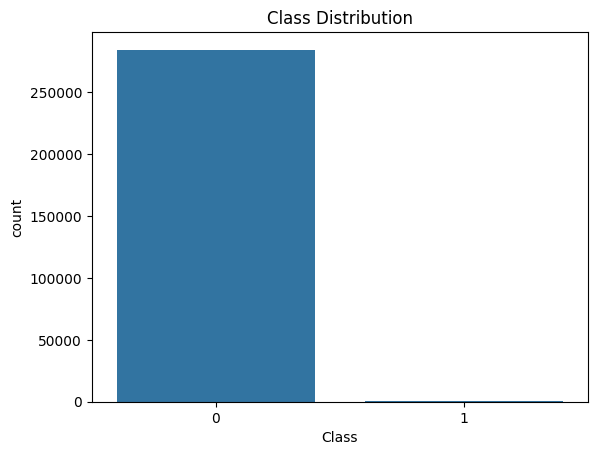

In [36]:
#Data imbalance check:
sns.countplot(x='Class', data = df)
plt.title('Class Distribution')
plt.show()

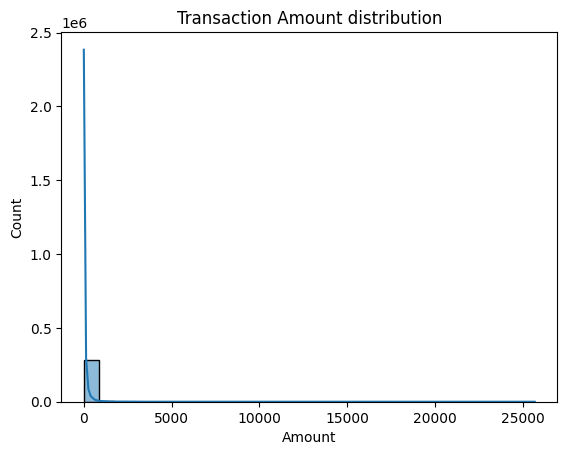

In [40]:
#Transaction a,ount distribution
sns.histplot(df['Amount'], bins = 30, kde=True)
plt.title('Transaction Amount distribution')
plt.show()

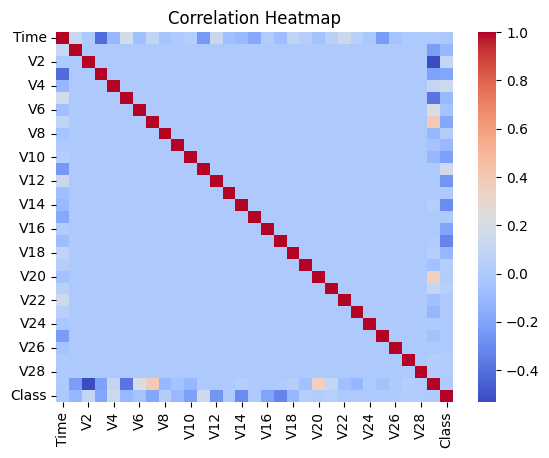

In [44]:
#correlation heatmap
correlation = df.corr()
sns.heatmap(correlation, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

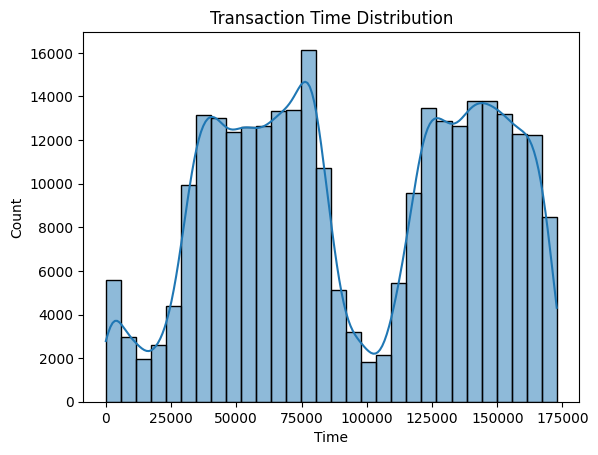

In [46]:
#Time feature analysis
sns.histplot(df['Time'], bins=30, kde=True)
plt.title('Transaction Time Distribution')
plt.show()

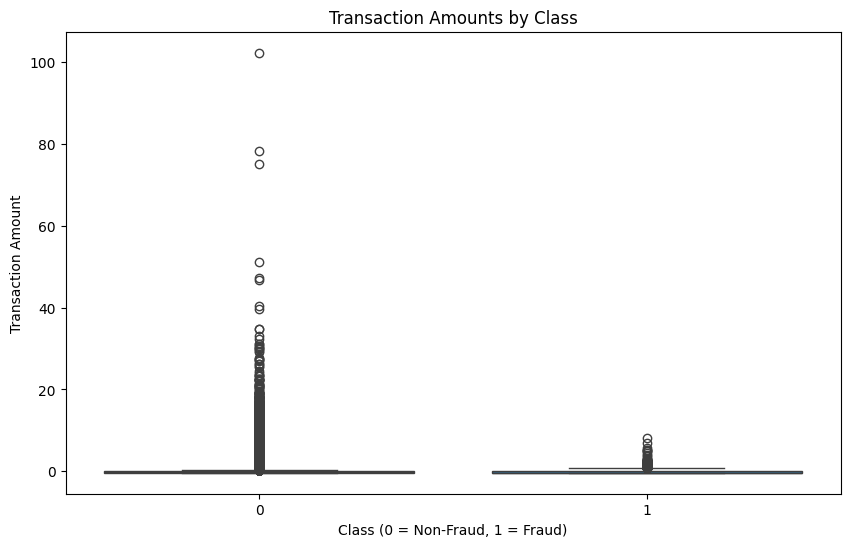

In [87]:
#Fraud vs Non-Fraud Amount Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Transaction Amounts by Class')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Transaction Amount')
plt.show()

C:\Users\abhij\AppData\Local\Temp\ipykernel_8660\2330654179.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 0]['Time'], label='Non-Fraud', shade=True)
C:\Users\abhij\AppData\Local\Temp\ipykernel_8660\2330654179.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Class'] == 1]['Time'], label='Fraud', shade=True, color='red')


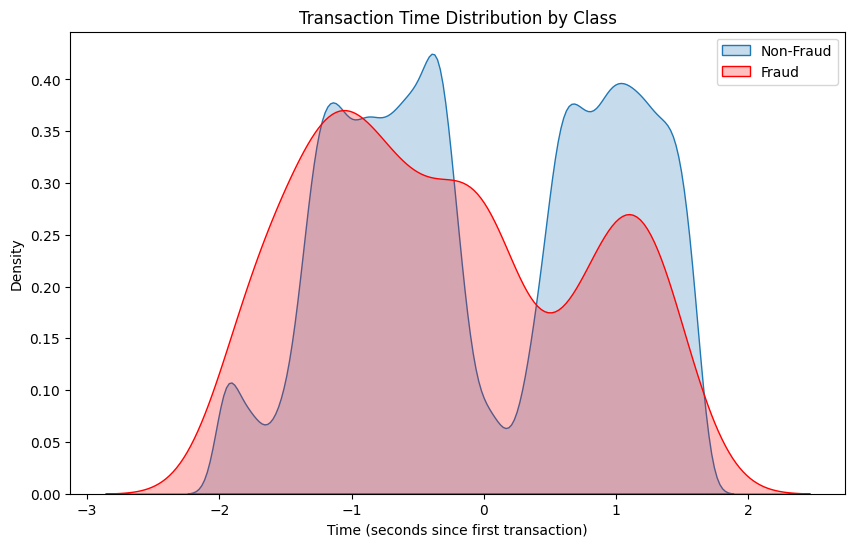

In [89]:
#Fraud vs. Non-Fraud Time distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Class'] == 0]['Time'], label='Non-Fraud', shade=True)
sns.kdeplot(df[df['Class'] == 1]['Time'], label='Fraud', shade=True, color='red')
plt.title('Transaction Time Distribution by Class')
plt.xlabel('Time (seconds since first transaction)')
plt.ylabel('Density')
plt.legend()
plt.show()

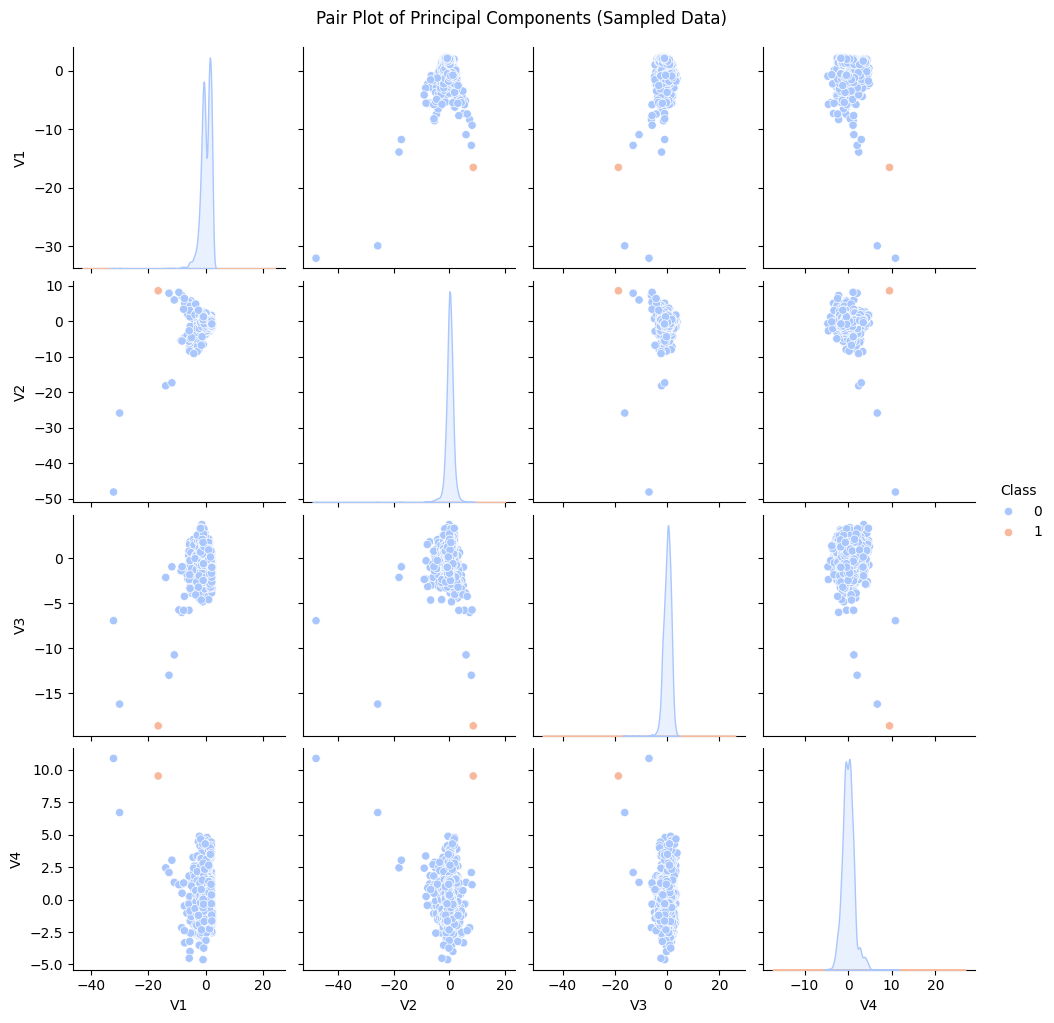

In [91]:
#Pair Plot od Principal components
sampled_df = df.sample(2000, random_state=42)  # Sample to reduce computation
sns.pairplot(sampled_df, vars=['V1', 'V2', 'V3', 'V4'], hue='Class', palette='coolwarm')
plt.suptitle('Pair Plot of Principal Components (Sampled Data)', y=1.02)
plt.show()

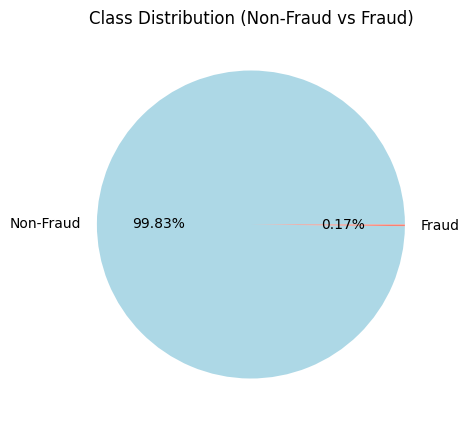

In [95]:
#Class Proportions (Pie Chart)
class_counts = df['Class'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(class_counts, labels=['Non-Fraud', 'Fraud'], autopct='%1.2f%%', colors=['lightblue', 'salmon'])
plt.title('Class Distribution (Non-Fraud vs Fraud)')
plt.show()

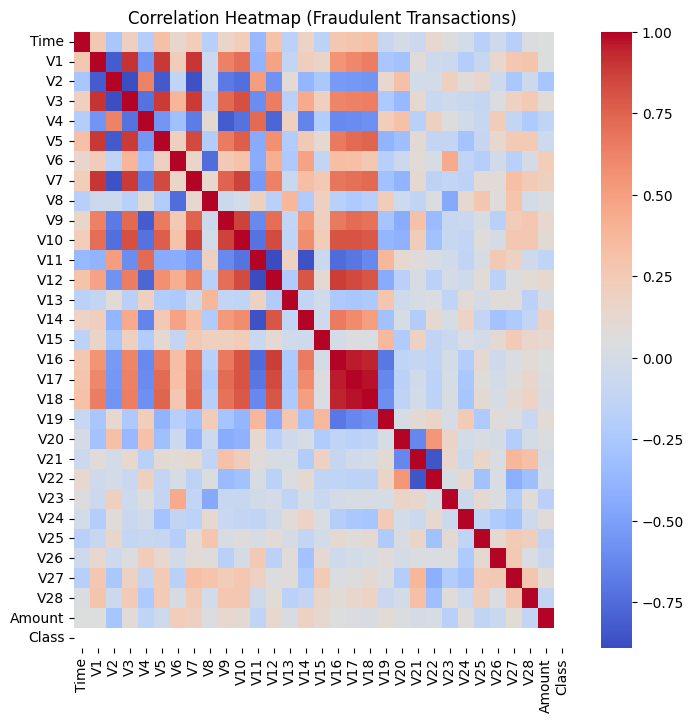

In [99]:
#correlation Matrix Focused on Fraud
fraud_corr = df[df['Class'] == 1].corr()
plt.figure(figsize=(8, 8))
sns.heatmap(fraud_corr, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap (Fraudulent Transactions)')
plt.show()

# Data Preprocessing

In [49]:
#Standardize features
scaler=StandardScaler()
df['Amount']=scaler.fit_transform(df[['Amount']])
df['Time']=scaler.fit_transform(df[['Time']])

In [53]:
#Split dataset
x = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Handling Imbalanced Data

In [56]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote=smote.fit_resample(X_train, y_train)

# Model Training 

In [67]:
#Logistic Regression
model = LogisticRegression()
model.fit(X_train_smote, y_train_smote)

LogisticRegression()

In [85]:
# Initialize the model
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)

# Fit the model on the SMOTE-resampled data
dt_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [69]:
#Evaluate the model

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[55406  1458]
 [    8    90]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



# Model Evaluation

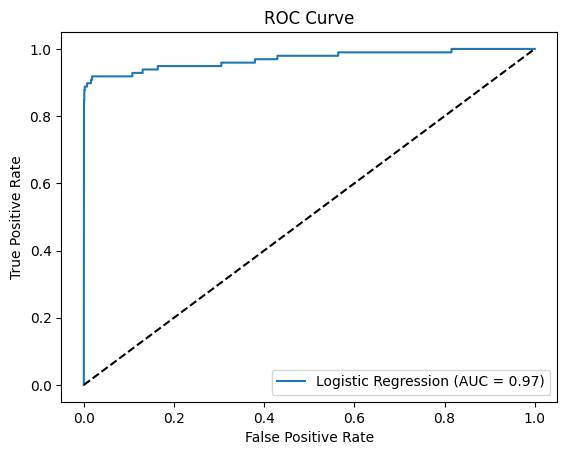

In [74]:
# ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

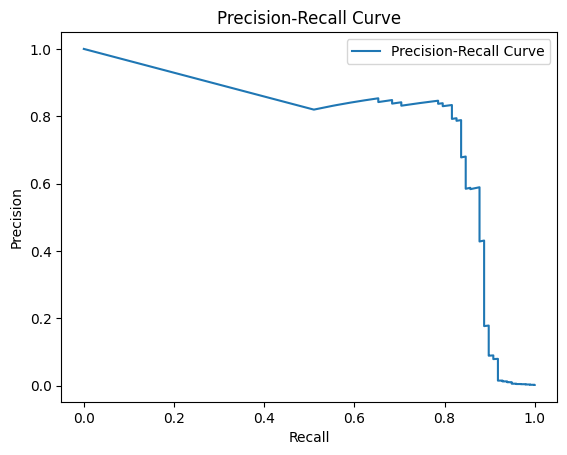

In [78]:
#PRecision-Recall Curve

precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Save the Model 

In [108]:
joblib.dump(model, 'creditcard.pkl')

['creditcard.pkl']